In [1]:
import tensorflow as tf

In [ ]:
img_width = 512
img_height = 512
img_channels = 3

# Data Processing

## Importing the Libraries

In [4]:
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt


C:\Users\Shirsendu\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


## Setting The path

In [5]:
train_path = "D:\\Data sets\\DRIVE\\training"
test_path = "D:\\Data sets\\DRIVE\\test"

In [6]:
train_ids = next(os.walk(train_path + "\images"))[2]
gt_ids = next(os.walk(train_path + "\\1st_manual"))[2]

test_ids = next(os.walk(test_path + "\images"))[2]

In [7]:
train_ids[:5]

['21_training.tif',
 '22_training.tif',
 '23_training.tif',
 '24_training.tif',
 '25_training.tif']

## Trial Pre-processing on a given image

In [7]:
#Having Problem With .tif extension

C:\Users\Shirsendu\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\io\manage_plugins.py:293: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  plugin_module = __import__('skimage.io._plugins.' + modname,


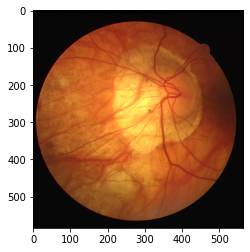

In [8]:
#ix = random.randint(0, len(train_ids)-1)
ix = 13
img = imread(train_path+ "\images\\" +train_ids[ix], plugin='pil')
plt.imshow(img)

In [9]:
red_channel = img[:,:,0]
green_channel = img[:,:,1]
blue_channel = img[:,:,2]

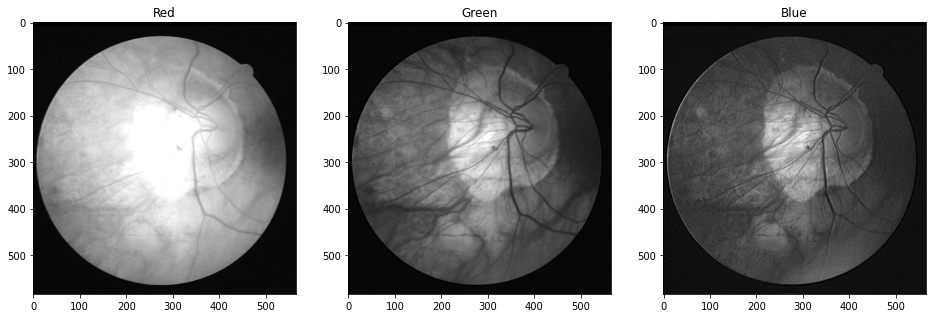

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(16, 16))
ax = axes.ravel()
ax[0].set_title("Red")
ax[0].imshow(red_channel, cmap = 'gray')
ax[1].set_title("Green")
ax[1].imshow(green_channel, cmap = 'gray')
ax[2].set_title("Blue")
ax[2].imshow(blue_channel, cmap = 'gray')

plt.show()

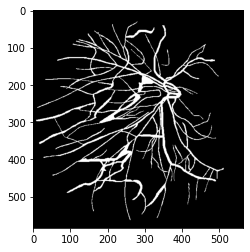

In [11]:
gt_img = imread(train_path+ "\\1st_manual\\" +gt_ids[ix], plugin='pil')
plt.imshow(gt_img, cmap = "gray")

In [12]:
gt_img.shape

(584, 565)

## Setting the Train Test Dataset

In [13]:
img.shape

(584, 565, 3)

In [14]:
X_train = np.zeros((len(train_ids), img_height, img_height, img_channels), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), img_height, img_height), dtype=np.uint8)

In [15]:
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = train_path +"\\images\\" +id_
    
    req_img = imread(path, plugin='pil')[:,:,:img_channels]
    req_img = resize(req_img, (img_height, img_width), mode='constant', preserve_range=True)
    #print(id_)
    X_train[n] = req_img  #Fill empty X_train with values from img
    
    path = train_path +"\\1st_manual\\" + gt_ids[n]
    req_gt = imread(path, plugin='pil')  
    req_gt = resize(req_gt, (img_height, img_width), mode='constant', preserve_range=True)
    #print(gt_ids[n])
    Y_train[n] = req_gt 
    
    
print("Done")

  5%|▌         | 1/20 [00:00<00:02,  7.58it/s]

Resizing training images and masks


100%|██████████| 20/20 [00:01<00:00, 12.11it/s]

Done


In [16]:
X_test = np.zeros((len(test_ids), img_height, img_width, img_channels), dtype=np.uint8)
sizes_test = []

In [17]:
# test images
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = test_path + "\\images\\" +id_
    req_img = imread(path, plugin='pil')[:,:,:img_channels]
    sizes_test.append([req_img.shape[0], img.shape[1]])
    req_img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    #print(id_)
    X_test[n] = req_img
    

print('Done!')

 10%|█         | 2/20 [00:00<00:01, 17.09it/s]

Resizing test images


100%|██████████| 20/20 [00:01<00:00, 16.91it/s]

Done!


## Preview of the dataset

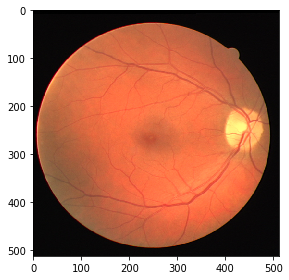

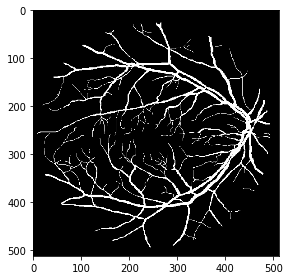

In [18]:
#Preview of the Training Data
image_x = random.randint(0, len(train_ids)-1)
imshow(X_train[image_x])
plt.show()
imshow(Y_train[image_x])
plt.show()

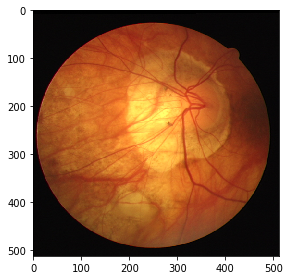

In [19]:
#Preview of the Test data
image_x = random.randint(0, len(test_ids)-1)
imshow(X_test[image_x])
plt.show()

# The Model

In [20]:
norm_inputs = tf.keras.layers.Input((img_height, img_width,img_channels))
inputs = tf.keras.layers.Lambda(lambda x: x/255)(norm_inputs)

## Contraction

In [21]:
c1 = tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c1)
p1 = tf.keras.layers.MaxPool2D((2,2))(c1)

In [22]:
c2 = tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c2)
p2 = tf.keras.layers.MaxPool2D((2,2))(c2)

In [23]:
c3 = tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(p2)
c3 = tf.keras.layers.Dropout(0.1)(c3)
c3 = tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c3)
p3 = tf.keras.layers.MaxPool2D((2,2))(c3)

In [24]:
c4 = tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(p3)
c4 = tf.keras.layers.Dropout(0.1)(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c4)
p4 = tf.keras.layers.MaxPool2D((2,2))(c4)

In [25]:
c5 = tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(p4)
c5 = tf.keras.layers.Dropout(0.1)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c5)
p5 = tf.keras.layers.MaxPool2D((2,2))(c5)

In [26]:
c51 = tf.keras.layers.Conv2D(512, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(p5)
c51 = tf.keras.layers.Dropout(0.1)(c51)
c51 = tf.keras.layers.Conv2D(512, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c51)
p51 = tf.keras.layers.MaxPool2D((2,2))(c51)

## Expansion

In [27]:
u52 = tf.keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c51)
u52 = tf.keras.layers.concatenate([u52, c5])
c52 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u52)
c52 = tf.keras.layers.Dropout(0.2)(c52)
c52 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c52)

In [28]:
print(c2.shape, "c2")
print(c3.shape, "c3")
print(c4.shape, "c4")
print(c5.shape, "c5")
print(c51.shape, "c51")
print(u52.shape, "c52")
print(u6.shape, "u6")
print(u7.shape, "u7")
print(u8.shape, "u8")

(None, 256, 256, 32) c2
(None, 128, 128, 64) c3
(None, 64, 64, 128) c4
(None, 32, 32, 256) c5
(None, 16, 16, 512) c51
(None, 32, 32, 512) c52


NameError: name 'u6' is not defined

In [30]:
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c52)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

In [31]:
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

In [32]:
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

In [33]:
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

In [34]:
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

In [35]:
model = tf.keras.Model(inputs=[norm_inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 512, 512, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 512, 512, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [36]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    tf.keras.callbacks.ModelCheckpoint("Create_gt.h5", verbose=1, save_best_only=True)
    #tf.keras.callbacks.TensorBoard(log_dir = 'logs')
]

In [ ]:
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25


In [122]:
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

1/1 [==============================] - 0s 998us/step


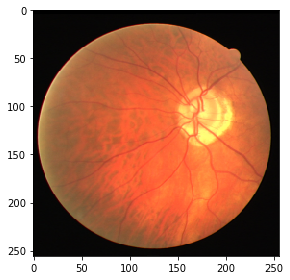

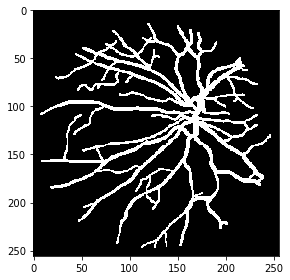

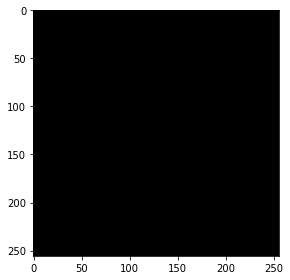

In [123]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

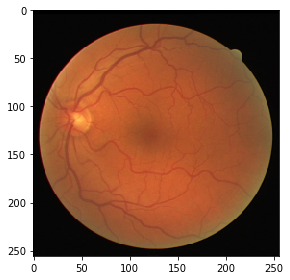

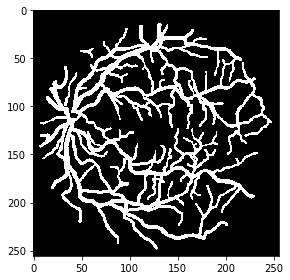

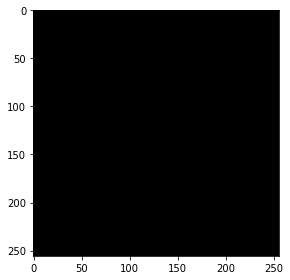

In [127]:
ix = random.randint(0, len(preds_val_t)-1)
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()


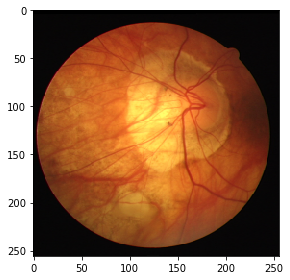

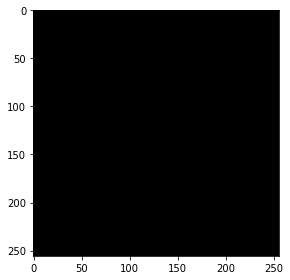

In [125]:
ix = random.randint(0, len(preds_test_t))
imshow(X_test[ix])
plt.show()
imshow(np.squeeze(preds_test_t[ix]))
plt.show()